# Khipus.ai
## Introduction to Machine Learning
### Classification
### Logistic Regression vs Random Forest
### Case Study: Bank loans Approval 
<span>© Copyright Notice 2025, Khipus.ai - All Rights Reserved.</span>


### About Dataset
This dataset contains various demographic and financial features that could be used to build a classification model for predicting loan approval or denial. The loan_status column serves as the target variable for the classification task.

Source: https://www.kaggle.com/datasets/sujithmandala/simple-loan-classification-dataset

## Data Exploration
In this section, we will explore the dataset to understand its structure, identify missing values, and gain insights into the features.

In [16]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split



In [17]:
# Load the dataset
file_path = 'loan.csv'
loan_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
loan_data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


## Data Cleaning
Here, we clean the data by handling missing values and encoding categorical variables.

In [18]:

# Check for missing values
print("Missing values in each column:")
print(loan_data.isnull().sum())

# Encode categorical variables
loan_data_encoded = pd.get_dummies(loan_data, drop_first=True)

# Display the cleaned dataset
loan_data_encoded.head()


Missing values in each column:
age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64


,age,income,credit_score,gender_Male,occupation_Analyst,occupation_Architect,occupation_Artist,occupation_Banker,occupation_Chef,occupation_Consultant,...,occupation_Stylist,occupation_Teacher,occupation_Veterinarian,occupation_Writer,education_level_Bachelor's,education_level_Doctoral,education_level_High School,education_level_Master's,marital_status_Single,loan_status_Denied
0,32,85000,720,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,45,62000,680,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
2,28,25000,590,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
3,51,105000,780,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,36,75000,710,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


## Feature Selection and Splitting Training and Test Data
We'll select relevant features and split the dataset into training and test sets.

In [19]:

# Define features (X) and target (y)
X = loan_data_encoded.drop('loan_status_Denied', axis=1)
y = loan_data_encoded['loan_status_Denied']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((48, 46), (13, 46), (48,), (13,))

## Building the Logistic Regression Model
We will use logistic regression to classify the loan status.

In [20]:
# Import the LogisticRegression class
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)# Increase the number of iterations

# Train the model on the training data
model.fit(X_train, y_train)

# Display model coefficients
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


Model coefficients: [[-5.83146268e-02 -5.12041755e-03  4.17593395e-01 -2.38755484e-02
   1.22896904e-08  1.38004808e-08 -4.88931046e-08  1.20326290e-08
   3.78650535e-07  1.12125640e-08  0.00000000e+00  2.52514425e-02
   2.42385678e-09  0.00000000e+00 -2.38759308e-02  2.22862822e-08
   8.02833434e-09  1.78829247e-08  7.75562862e-09  1.12117132e-08
   8.87095679e-09  0.00000000e+00  6.28118617e-07  3.85660876e-09
  -4.98629081e-08  9.78674206e-09  6.82064421e-09  7.25323866e-09
   5.31164505e-09  1.83247397e-08 -9.47038947e-08  1.14044621e-08
   1.18384698e-08 -4.40619712e-08 -4.54340929e-08  8.87097739e-09
  -4.45702294e-08 -5.05062924e-08  6.51431041e-07  1.07744036e-08
  -4.41017273e-08  2.52514650e-02  3.69427871e-08 -2.38761595e-02
   7.31812364e-07  1.37640366e-03]]
Model intercept: [0.00220693]


## Making Predictions
Using the trained model, we will make predictions on the test data.

In [21]:

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display predictions
y_pred[:10]


array([False,  True, False, False, False, False,  True,  True,  True,
       False])

## Evaluating the Model
Evaluate the model's performance using metrics such as accuracy, precision, and recall.

In [22]:

from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         9
        True       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



Note: Support is not a metric but simply a count of samples for each class. It helps understand the class distribution in the dataset.

## Visualizing the Results
Visualize the confusion matrix to better understand the model's performance.

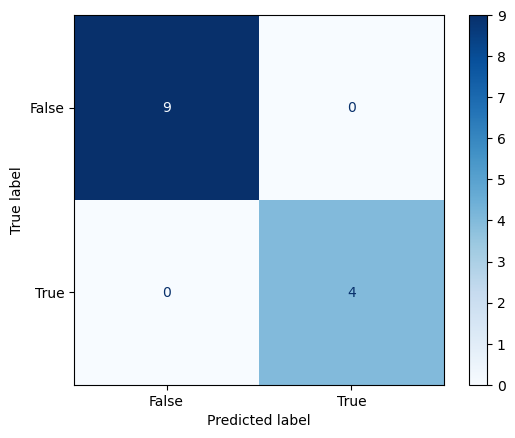

In [23]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()


True Positive (TP): 4

True Negative (TN): 9

False Positive (FP): 0

False Negative (FN): 0

## Building the Random Forest model
We will do a comparation between the Logistic Regression and the Rando Forest


In [24]:
# Import the RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

## Evaluating the Model
Evaluate the model's performance using metrics such as accuracy, precision, and recall.

Random Forest Accuracy: 0.92
Random Forest Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.89      0.94         9
        True       0.80      1.00      0.89         4

    accuracy                           0.92        13
   macro avg       0.90      0.94      0.92        13
weighted avg       0.94      0.92      0.93        13



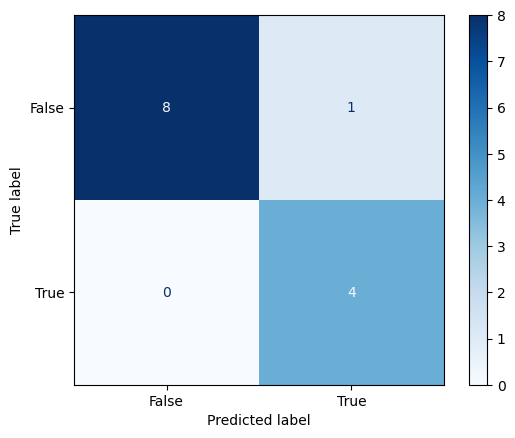

In [25]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Display classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap='Blues')
plt.show()

True Positive (TP): 4

True Negative (TN): 8

False Positive (FP): 1

False Negative (FN): 0

## Performance Comparison: Logistic Regression vs. Random Forest

Accuracy: Logistic Regression performed slightly better, achieving 100% accuracy, while Random Forest achieved 92% accuracy.

Precision: Logistic Regression had perfect precision for both True and False classes, while Random Forest was slightly lower for the True class (80%).

Recall: Logistic Regression had perfect recall (1.00) for all classes, but Random Forest had a recall of 0.89 for False and 1.00 for True.

F1-Score: Logistic Regression maintained perfect F1-scores for both classes, while Random Forest had a slightly lower F1-score for the True class (0.89).

Summary:
Logistic Regression outperformed Random Forest in all metrics for this dataset.
Random Forest still performed well, but it struggled slightly in predicting the False class compared to Logistic Regression's perfect performance.

### Why Logistic Regression Outperformed Random Forest
Clear Linear Relationships: The data likely follows a linear pattern, which aligns well with Logistic Regression's strengths.
Imbalanced Dataset: Logistic Regression handles imbalanced data better by predicting probabilities directly, while Random Forest can struggle.

Simple Data Patterns: The dataset is small and has straightforward relationships, favoring Logistic Regression over more complex models like Random Forest.

Regularization: Logistic Regression uses built-in regularization to prevent overfitting, which helps in small datasets.

Small Dataset Size: Logistic Regression requires less data to train effectively, whereas Random Forest needs more data to optimize its multiple decision trees.